In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### As part of the QC program of the assay lab, several duplicates are inserted in the course of the sample preparation and analysis.
#### This project is a study on the duplicate runs of nickel ore pellets as done in our lab.
#### Twin samples(TS),  a duplicate on the very start of the sample reduction process.
#### Course Duplicates (CD) - sample pulverized from the coarse crushed sample,
#### Pulp duplicates (PD) - same pulverizing process, different weighing and pelletizing,
#### Rerun(RR), same pellet, rerun on the same XRF.
## Expected variations would be TS > CD > PD > RR.

In [163]:
#Element columns are absolute values of the differences between duplicates
dup22 = pd.read_excel('/Users/ecuerbo/Desktop/data/2023 Duplicates Monitoring.xlsx', sheet_name=1) # data from 2022
dup23 = pd.read_excel('/Users/ecuerbo/Desktop/data/2023 Duplicates Monitoring.xlsx', sheet_name=0) # data from 2023

In [164]:
#rename columns
dup22.columns = ['DATE', 'XRF', 'JOB CODE', 'Kind', 'Ni', 'Fe', 'Alumina']

In [165]:
dup22.head()

,DATE,XRF,JOB CODE,Kind,Ni,Fe,Alumina
0,2022-03-31 06:28:00,3,F22-002,TS,0.0300,0.640,0.8100
1,2022-10-28 10:59:00,4,M22-653,PD,0.0251,1.070,0.8090
2,2022-10-19 02:13:00,4,M22-603,PD,0.0070,0.010,0.6740
3,2022-10-14 02:55:00,4,M22-555,TS,0.0100,0.355,0.6541
4,2022-04-12 02:30:00,3,F22-027,TS,0.0100,0.040,0.6500


## Check Distribution of Values

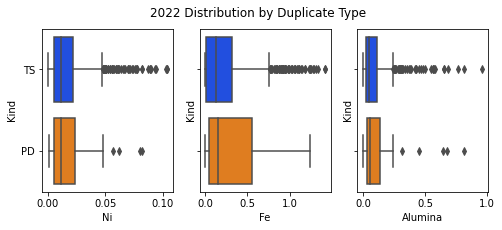

In [220]:
fig, axes = plt.subplots(1,3, figsize=(8,3), sharey=True)

fig.suptitle('2022 Distribution by Duplicate Type')
sns.boxplot(ax=axes[0], y=dup22.Kind, x=dup22.Ni, palette='bright')
#axes[0].set_title("Ni")
sns.boxplot(ax=axes[1], y=dup22.Kind, x=dup22.Fe, palette='bright')
#axes[1].set_title("Fe")
sns.boxplot(ax=axes[2], y=dup22.Kind, x=dup22.Alumina, palette='bright');
#axes[2].set_title("Alumina");

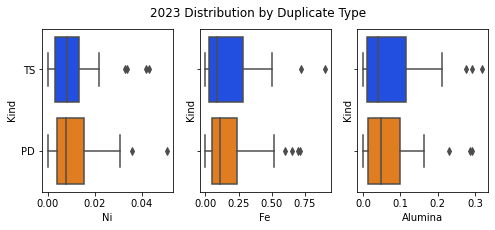

In [252]:
fig, axes = plt.subplots(1,3, figsize=(8,3), sharey=True)

fig.suptitle('2023 Distribution by Duplicate Type')
sns.boxplot(ax=axes[0], y=dup23.Kind, x=dup23.Ni, palette='bright')
sns.boxplot(ax=axes[1], y=dup23.Kind, x=dup23.Fe, palette='bright')
sns.boxplot(ax=axes[2], y=dup23.Kind, x=dup23.Alumina, palette='bright');

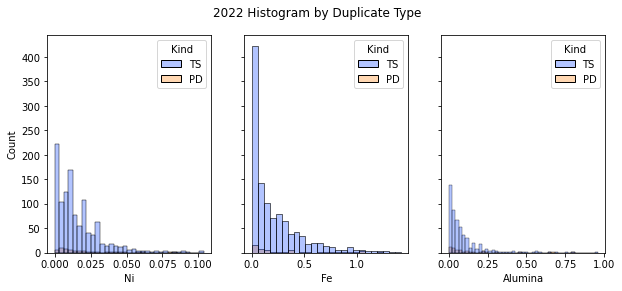

In [208]:
fig, axes = plt.subplots(1,3, figsize=(10,4), sharey=True)

fig.suptitle('2022 Histogram by Duplicate Type')
sns.histplot(ax=axes[0],data=dup22, x="Ni", hue="Kind", palette='bright', alpha=0.3)
#axes[0].set_title("Ni")
sns.histplot(ax=axes[1],data=dup22, x="Fe", hue="Kind", palette='bright', alpha=0.3)
#axes[1].set_title("Fe")
sns.histplot(ax=axes[2],data=dup22, x="Alumina", hue="Kind", palette='bright', alpha=0.3);
#axes[2].set_title("Alumina");

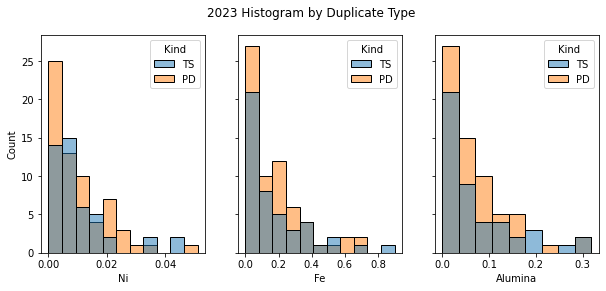

In [251]:
fig, axes = plt.subplots(1,3, figsize=(10,4), sharey=True)

fig.suptitle('2023 Histogram by Duplicate Type')
sns.histplot(ax=axes[0],data=dup23, x="Ni", hue="Kind")
sns.histplot(ax=axes[1],data=dup23, x="Fe", hue="Kind")
sns.histplot(ax=axes[2],data=dup23, x="Alumina", hue="Kind");

In [221]:
grouped_dup22 = dup22.groupby(["XRF","Kind"]).agg(
    median_Ni=("Ni", "median"),
    std_Ni=("Ni", "std"),
    median_Fe=("Fe", "median"),
    std_Fe=("Fe", "std"),
    median_Alumina=("Alumina", "median"),
    std_Alumina=("Alumina", "std"),
).round(3).reset_index()


grouped_dup22

,XRF,Kind,median_Ni,std_Ni,median_Fe,std_Fe,median_Alumina,std_Alumina
0,2,TS,0.010,0.014,0.140,0.332,0.055,0.105
1,3,PD,0.009,0.014,0.073,0.275,0.061,0.088
2,3,TS,0.012,0.015,0.130,0.221,0.049,0.121
3,4,PD,0.012,0.022,0.230,0.411,0.056,0.200
4,4,TS,0.010,0.017,0.090,0.284,0.055,0.125


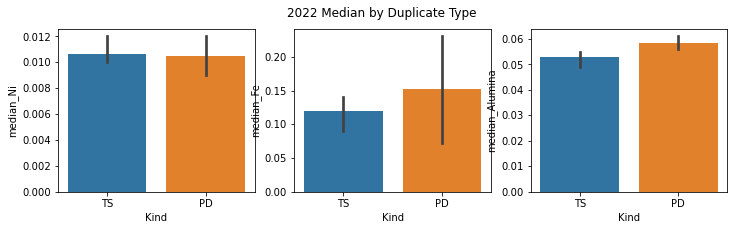

In [242]:
fig, axes = plt.subplots(1,3, figsize=(12,3), sharex=True)

fig.suptitle('2022 Median by Duplicate Type')
sns.barplot(ax=axes[0],data=grouped_dup22, y="median_Ni",x='Kind')
sns.barplot(ax=axes[1],data=grouped_dup22, y="median_Fe", x="Kind")
sns.barplot(ax=axes[2],data=grouped_dup22, y="median_Alumina", x="Kind");

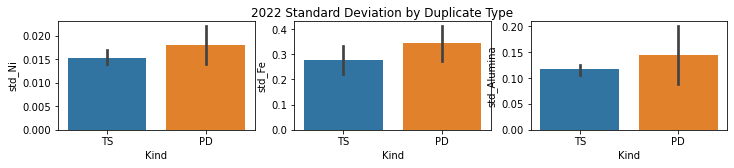

In [248]:
fig, axes = plt.subplots(1,3, figsize=(12,2), sharex=True)

fig.suptitle('2022 Standard Deviation by Duplicate Type')
sns.barplot(ax=axes[0],data=grouped_dup22, y="std_Ni",x='Kind')
sns.barplot(ax=axes[1],data=grouped_dup22, y="std_Fe", x="Kind")
sns.barplot(ax=axes[2],data=grouped_dup22, y="std_Alumina", x="Kind");

In [244]:
grouped_dup23 = dup23.groupby(["XRF","Kind"]).agg(
    median_Ni=("Ni", "median"),
    std_Ni=("Ni", "std"),
    median_Fe=("Fe", "median"),
    std_Fe=("Fe", "std"),
    median_Alumina=("Alumina", "median"),
    std_Alumina=("Alumina", "std"),
).round(3).reset_index()

grouped_dup23

,XRF,Kind,median_Ni,std_Ni,median_Fe,std_Fe,median_Alumina,std_Alumina
0,3,PD,0.009,0.011,0.12,0.147,0.051,0.066
1,3,TS,0.009,0.011,0.09,0.194,0.040,0.083
2,4,PD,0.006,0.007,0.10,0.217,0.036,0.064
3,4,TS,0.004,0.004,0.09,0.226,0.046,0.088


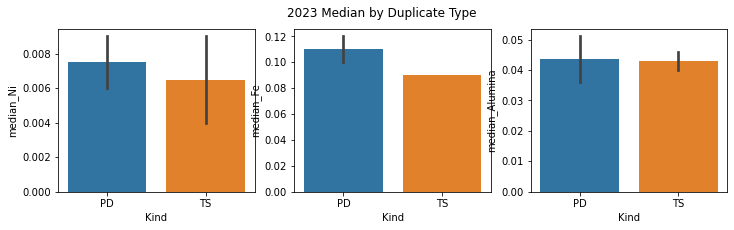

In [245]:
fig, axes = plt.subplots(1,3, figsize=(12,3), sharex=True)

fig.suptitle('2023 Median by Duplicate Type')
sns.barplot(ax=axes[0],data=grouped_dup23, y="median_Ni",x='Kind')
sns.barplot(ax=axes[1],data=grouped_dup23, y="median_Fe", x="Kind")
sns.barplot(ax=axes[2],data=grouped_dup23, y="median_Alumina", x="Kind");

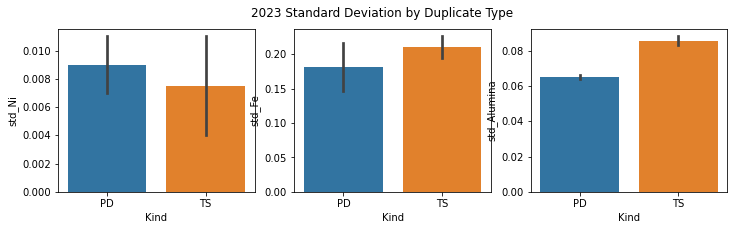

In [247]:
fig, axes = plt.subplots(1,3, figsize=(12,3), sharex=True)

fig.suptitle('2023 Standard Deviation by Duplicate Type')
sns.barplot(ax=axes[0],data=grouped_dup23, y="std_Ni",x='Kind')
sns.barplot(ax=axes[1],data=grouped_dup23, y="std_Fe", x="Kind")
sns.barplot(ax=axes[2],data=grouped_dup23, y="std_Alumina", x="Kind");